<a href="https://colab.research.google.com/github/codybaraks/Nairobi-Hospital/blob/master/Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DEFINE THE QUESTION**

### **Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.**

## **METRICS FOR SUCCESS**

**Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Identifying models accuracy and predictions

Decision Tress

Random Forest

Ada Boost

Svm

Support Vector **

## **THE CONTEXT**

### **Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients**

## **EXPERIMENTAL DESIGN**

Performing the following machnes

exploratory data analysis

Feature Engineering

Modelling

Work with 

Random Forest

Ada Boost

Support vector machine

# **Importing all Libraries used in the Project**

In [0]:
# Imports
import pandas as pd
import numpy as np
import pandas_profiling as pp

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

# XGB
import xgboost as xgb
# Import train_test_split
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# More Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC

# **Viewing the Dataset**

In [0]:
# Loading and Reading the dataset
hypo = pd.read_csv("hypothyroid.csv")
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
# Checking the tail of the set
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


# **Exploratory Data Analysis**

In [0]:
# shape of the dataset
hypo.shape

(3163, 26)

In [0]:
# size of the dataset
hypo.size

82238

In [0]:
# Viewing the dataset Columns
hypo.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [0]:
# Checking information of the dataset
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [0]:
# Checking for the data types
hypo.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
# pp.ProfileReport(hypo)

## **Feature Engineering**

In [0]:
hypo['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [0]:
# Checking for unique values in all columns in the dataset
for uni in hypo.columns:
#   print(hypo.columns)
  print("\t")
  print(hypo[uni].unique())


	
['hypothyroid' 'negative']
	
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
	
['M' 'F' '?']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['y' 'n']
	
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' 

In [0]:
# Removing the question marks in each column - data cleaning
#   f['column'] = df['column'].replace(np.nan, 0)
# for clean in hypo.columns:
# #    hypo[clean] = hypo[clean].replace('?','nan')
#     hypo[clean].replace('?',np.nan,inplace=True)
hypo.replace('?',np.nan,inplace=True)
   


In [0]:
# Convert Age, TSH, T3, TT4, T4U, FTI to numerical(Float)
hypo[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]] = hypo[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]].astype(float)

In [0]:
# Converting to categorical data
hypo[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] = hypo[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]].astype('category')

In [0]:
hypo.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [0]:
hypo.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
# replacing nan from sex column
# gender = hypo[hypo["sex"] == 'nan'].index

# hypo.drop(gender,inplace=True)

# indexNames = dfObj[ dfObj['Age'] == 30 ].index
hypo['sex'] = hypo['sex'].fillna(hypo['sex'].mode()[0])

In [0]:
# Confirming to see if it has been dropped - it has been dropped
hypo["sex"].unique()

[M, F]
Categories (2, object): [M, F]

In [0]:
# fill the null values with the  mode
# data['sex'] = data['sex'].fillna(data['sex'].mode()[0])
hypo['age'] = hypo['age'].fillna(hypo['age'].mode()[0])
hypo['TSH'] = hypo['TSH'].fillna(hypo['TSH'].mode()[0])
hypo['T3'] = hypo['T3'].fillna(hypo['T3'].mode()[0])
hypo['TT4'] = hypo['TT4'].fillna(hypo['TT4'].mode()[0])
hypo['FTI'] = hypo['FTI'].fillna(hypo['FTI'].mode()[0])
hypo['TBG'] = hypo['TBG'].fillna(hypo['TBG'].mode()[0])                                
hypo['T4U'] = hypo['T4U'].fillna(hypo['T4U'].mode()[0])                      
                                

In [0]:
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
# dropping duplicates
hypo.duplicated().sum()

78

In [0]:
hypo_dup = hypo.drop_duplicates(keep=False)

In [0]:
hypo_dup.duplicated().sum()

0

### ** Asigning Numeric(Float) and Catergorical data **

In [0]:
hypo_dup.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [0]:
hypo_dup.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [0]:
hypo_dup.columns
n =['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

d= hypo_dup[n]


y= hypo_dup['status'].value



In [0]:
X = pd.get_dummies(d)

In [0]:
# Chceking the shape of the set X
X.shape

(3008, 43)

In [0]:
# Chceking the shape of the set y
y.shape

(3008,)

In [0]:
import seaborn as sns
%matplotlib inline

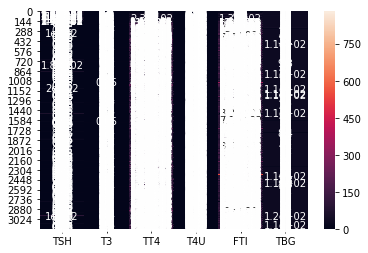

In [0]:
colu = hypo[["TSH", "T3", "TT4", "T4U", "FTI","TBG"]]
sns.heatmap(colu, annot=True)

In [0]:
pp.ProfileReport(colu)

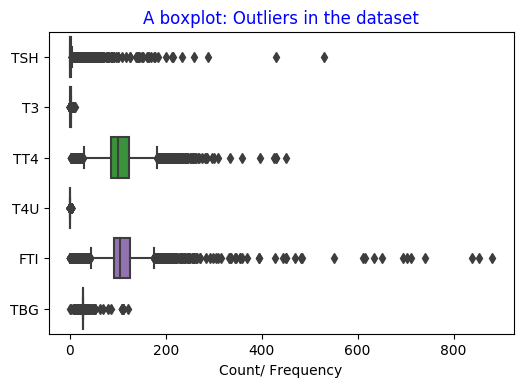

In [0]:
# check for outliers for the
colu = hypo_dup[["TSH", "T3", "TT4", "T4U", "FTI","TBG"]]
# np.asarray(colu).reshape()
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = colu , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

### TSH, TT4 AND FTI HAVE a LARGE NUMBER OF OUTLIERS

In [0]:
hypo.dtypes

# **PART 1**

## **Modelling - Random Forest**

In [0]:
# Random forests or random decision forests are an ensemble learning method for classification,
# regression and other tasks that operates by constructing a multitude of decision trees
# at training time and outputting

In [0]:
hypo.head(3)

In [0]:
# Question?
# Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.
# Define your target and independent variables
# hypo[["status","age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] = pd.to.numeric(hypo[["status","age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]], errors='coerce').astype(int)
# dummy = pd.get_dummies(hypo,drop_first=True)
# dummy


In [0]:
hypo_dup.columns
n =['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

d= hypo_dup[n]


# y= hypo_dup['status']

In [0]:
X = pd.get_dummies(d)

In [0]:
y = hypo_dup["status"]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [0]:
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Predition
y_pred = forest.predict(X_test)
# y_pred

In [0]:
# metrics for performance and Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [0]:
#from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("gradient_Accuracy:",metrics.accuracy_score(y_test, y_pred))

gradient_Accuracy: 0.9867109634551495


In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


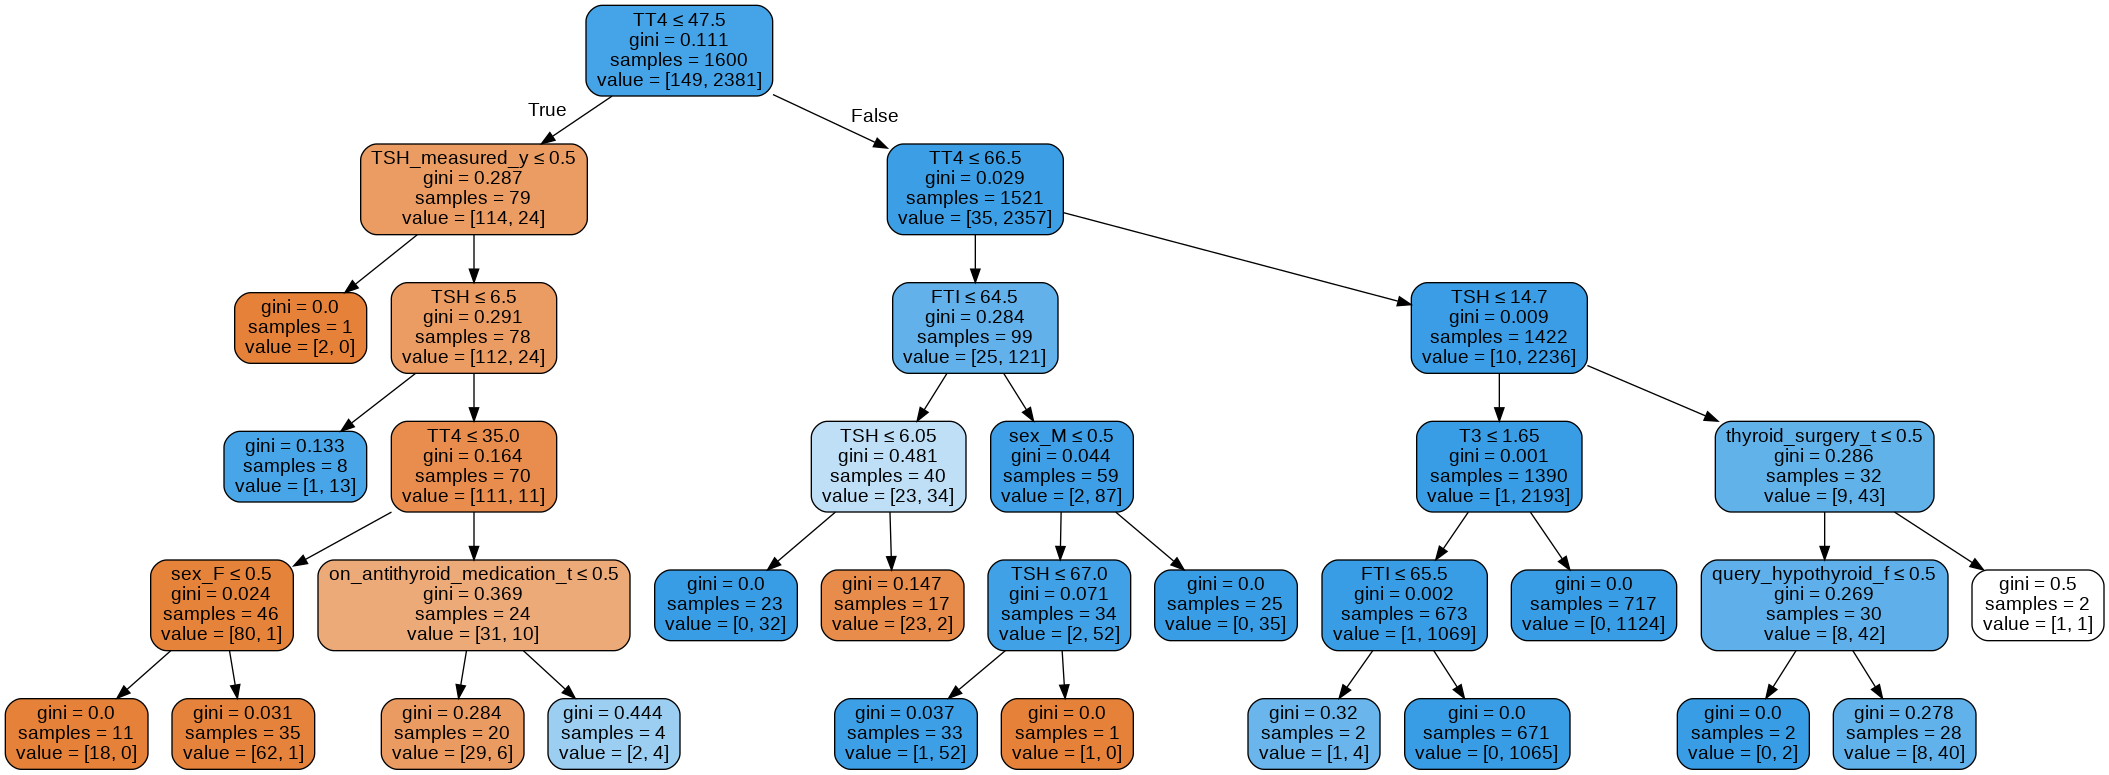

In [0]:
# Performance of individual decision trees
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [0]:
# metrics for performance and Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [0]:
# Finding confusion matrics, accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 16   7]
 [  1 578]]
              precision    recall  f1-score   support

 hypothyroid       0.94      0.70      0.80        23
    negative       0.99      1.00      0.99       579

    accuracy                           0.99       602
   macro avg       0.96      0.85      0.90       602
weighted avg       0.99      0.99      0.99       602

0.9867109634551495


## **After tuning the parameters, the model predicted about 609 out of 633 had shown indications of hypothyroid, the accuracy of the model was about 98.6%**

## ** which features are most impactful in influencing the prediction**

In [320]:
  importances = list(tree.feature_importances_)

  # We now use some Python magic to connect each feature with its importance
  # List of tuples with variable and importance
  feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

  print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
  print()

  # Nice to have: We can sort the values in descending order, since we care about the most important features first.
  feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

  # Print out the feature and importances 
  [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.0), ('TSH', 0.19), ('T3', 0.0), ('TT4', 0.75), ('T4U', 0.0), ('FTI', 0.04), ('TBG', 0.0), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.01), ('thyroid_surgery_f', 0.0), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_n', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_n', 0.0), ('T3_measured_y', 0.0), ('TT4_measured_n', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_n', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_n', 0.0), ('FTI_measured_y', 0.0), ('TBG_measured_n', 0.0), ('TBG_measured_y', 0.0)]

Variable: T

## **"TT4" followed by "TSH" were the most most impactful features**

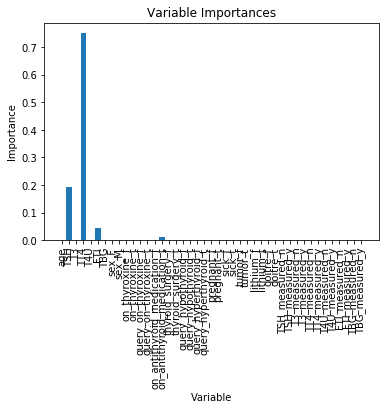

In [0]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


### **"TT4" and on "TSH" columns above**

# **Ada Boost**

In [0]:
# What is it?
# AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm, its used to improve performance

In [0]:
# Descrbing the dataset
hypo.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,52.260512,5.046782,1.865096,107.995858,0.978340,114.741985,28.269870
std,18.089308,22.160083,0.891612,43.755469,0.217513,57.882814,5.575519
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000,28.000000
50%,58.000000,0.400000,1.600000,100.000000,0.980000,107.000000,28.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000,28.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [0]:
# Viewing the set
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,28.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,28.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,28.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,28.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,28.0


In [0]:
hypo.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [0]:
X.shape

(3163, 43)

In [0]:
%matplotlib inline
import matplotlib.pylab as plt

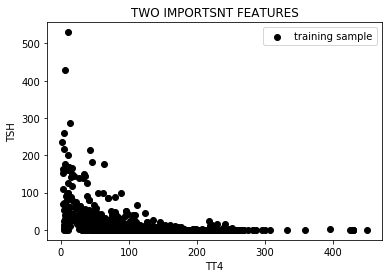

In [0]:
# Visualizing the set using the most important Features


X= hypo["TT4"]
y = hypo["TSH"]

plt.figure()
plt.scatter(X ,y, c='k',label="training sample")
plt.xlabel("TT4")
plt.ylabel("TSH")
plt.title("TWO IMPORTSNT FEATURES")
plt.legend()
plt.show()

In [0]:
# Importing ada boost classifier
from sklearn.ensemble import AdaBoostClassifier

In [0]:
#  Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)

In [0]:
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

In [0]:
#Predict the response for test dataset
y_predict = model.predict(X_test)

In [337]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9900332225913622


In [339]:
# Confusion matrix

conf_matrix = metrics.confusion_matrix(y_test,y_predict)
conf_matrix

array([[ 18,   5],
       [  1, 578]])

In [341]:
# Finding confusion matrics, accuracy score
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test, y_predict))

[[ 18   5]
 [  1 578]]
              precision    recall  f1-score   support

 hypothyroid       0.95      0.78      0.86        23
    negative       0.99      1.00      0.99       579

    accuracy                           0.99       602
   macro avg       0.97      0.89      0.93       602
weighted avg       0.99      0.99      0.99       602

0.9900332225913622


**AdaBoost reported an accuracy of about 99%**

# **Support Vector Machines**

In [0]:
# support-vector machines are supervised learning models
# with associated learning algorithms that analyze data used for 
# classification and regression analysis

In [0]:
# Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

In [344]:
hypo.head(1)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,28.0


In [370]:
# input for the model
# Specify the input for the model

tsh_tt4 = hypo_dup[['TSH', 'TT4']].as_matrix()
# Put a label of either a muffin or not and assign it 0 or 1
type_label = np.where(hypo_dup['status']=='hypothyroid',1,0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [371]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape

(602,)

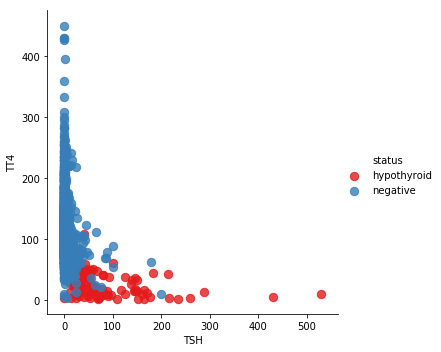

In [374]:
# Stating the classification cretia
sns.lmplot('TSH', 'TT4', data=hypo_dup, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [382]:
# Fitting the Model

model = SVC(kernel= 'linear')
model.fit(X_train,y_train)

# sns.lmplot('TSH', 'TT4', data=hypo_dup, hue='status',
#            palette='Set1', fit_reg=False, scatter_kws={"s": 70});

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# prediction
y_prediction = model.predict(X_test)
# y_prediction

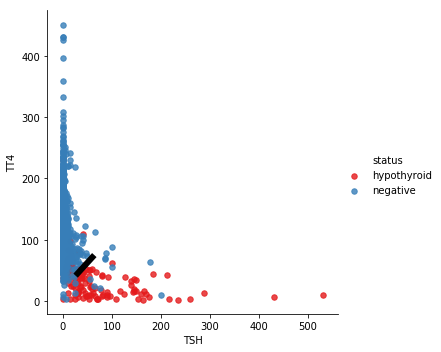

In [364]:

# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TSH','TT4', data=hypo_dup, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 30})
plt.plot(xx, yy, linewidth=6, color='black');


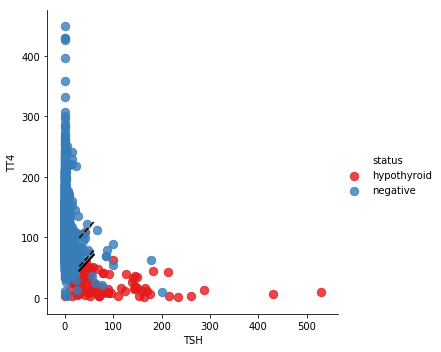

In [365]:
# Plotting the parallel lines
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot('TSH','TT4', data=hypo_dup, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none')

In [378]:
# Predition
hypothyroid_or_negative = model.predict([[60, 20]])
hypothyroid_or_negative

array([1])

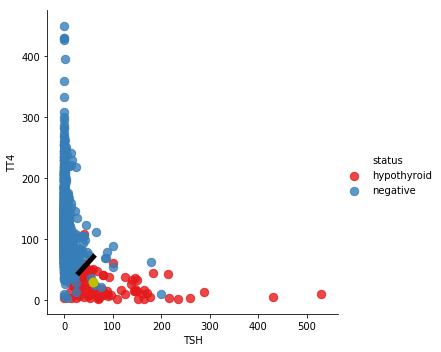

In [367]:
# Plot the point to visually see where the point lies
sns.lmplot('TSH', 'TT4', data=hypo_dup, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=5, color='black')
plt.plot(60, 30, 'yo', markersize='9');

In [386]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_prediction)
model_accuracy

0.9900332225913622

In [387]:
# Finding confusion matrics, accuracy score
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))
print(accuracy_score(y_test, y_prediction))

[[ 18   5]
 [  1 578]]
              precision    recall  f1-score   support

 hypothyroid       0.95      0.78      0.86        23
    negative       0.99      1.00      0.99       579

    accuracy                           0.99       602
   macro avg       0.97      0.89      0.93       602
weighted avg       0.99      0.99      0.99       602

0.9900332225913622


**Support vector resulted in an accuracy of 99%**